In [1]:
# scikit-learn is sklearn library. subpackage datasets has all of the datasets that come bundled with scikit-learn.
# There is a function called load_digits which is capable of loading digits dataset.
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
# you get back bunch object of sklearn library. 
# bunch is a class which is subclass of python dictionary type.
# but it has additional attributes that allow you to interact with the dataset.
type(digits)

sklearn.utils.Bunch

In [4]:
help(digits)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ---------

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# contains description of the dataset.
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Checking the sample and target sizes
Bunch contains data and target NumPy arrays
    - data contains the samples
    - each sample's 64 attributes have values 0-16
    - target contains the labels
        - making predictions airms to 'hit the target'

In [10]:
# displaying target values with 100 interval to check the dataset.
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [12]:
# check the shape of data
# 1797 samples and each sample has 64 attributes, with values 0 to 16 intensity of colors.
# it is two dimentional array
digits.data.shape

(1797, 64)

In [14]:
# check shape for target
# 1797 records with one dimentional array.
digits.target.shape

(1797,)

In [6]:
# images attribute allow you to check the data in two dimentional form
# each sample has 64 attributes . Value 0 is white space and as number goes closer to 16 its darker grey in color.
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [7]:
# scikit\-learn estimators require samples to be stored in two dimentational array of floating point values.
# each row representing sample and columns with values.
# scikit learn require all of the data used for machine learning represented in numeric values
# catagorical data need to be changed to numberical data - technique is called one-hot  encoding.

In [8]:
# this is the same data we looked at with images attribute. 
# however this is flattened into single dimention array.
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [9]:
import matplotlib.pyplot as plt

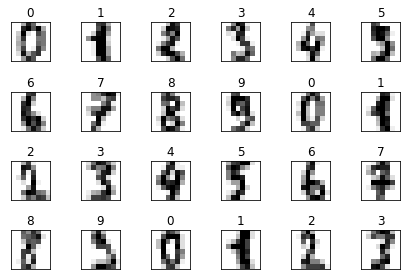

In [12]:
# subplots gives back couple of NumPy arrays.
# figure is window with 6 X 4 in which axes objects are displayed.
# axes is two dimentional array with 6 X 4
# figsize is size of each image that we set to 6 inch X 4 inch respectively.
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

# now we loope throgh axes object and displace images in digits.images object. And use targets to label them
# axes.ravel() - flattens to 24 , hence zip ends after iterating 24 times
# zip returns tuple
# Matplotlib has prenamed color maps. plt.cm is the object that gives access to prenamed color maps.
# plt.cm.gray_r is gray scale color map. no pixel intensity represnts white and full pixel intesity represents black.
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x axes tick marks
    axes.set_yticks([]) # remvoe y axes tick marks
    axes.set_title(target)

# to use the space better 
plt.tight_layout()
    